# Bài tập thực hành 2
## Xây dựng mô hình Naïve Bayes trên tập dữ liệu Mushroom

### 1. Import thư viện và nạp dữ liệu

In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Nạp dữ liệu Mushroom từ Kaggle
df = pd.read_csv('mushrooms.csv')

# Xem qua dữ liệu
print("Thông tin dữ liệu:")
print(df.info())
print("\n5 hàng đầu tiên:")
print(df.head())
print("\nCác cột trong dữ liệu:", df.columns.tolist())
print("\nPhân phối nhãn:")
print(df['class'].value_counts())

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk

### 2. Tiền xử lý dữ liệu

In [2]:
# Tất cả các cột đều là phân loại, mã hóa one-hot cho phù hợp với Multinomial NB
X = df.drop('class', axis=1)
y = df['class']

# Mã hóa nhãn y (e: 0, p: 1)
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

# Mã hóa one-hot cho X
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' tránh multicollinearity
X_encoded = encoder.fit_transform(X)

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"Kích thước tập train: {X_train.shape}")
print(f"Kích thước tập test: {X_test.shape}")
print(f"Phân phối nhãn trong train: {np.bincount(y_train)}")

Kích thước tập train: (6499, 95)
Kích thước tập test: (1625, 95)
Phân phối nhãn trong train: [3366 3133]


### 3. Xây dựng và huấn luyện mô hình Multinomial Naive Bayes

In [3]:
# Khởi tạo và huấn luyện mô hình Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = nb_model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_y.classes_, zero_division=1))

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           e       0.92      0.99      0.96       842
           p       0.99      0.91      0.95       783

    accuracy                           0.95      1625
   macro avg       0.96      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



### 4. Vẽ Confusion Matrix

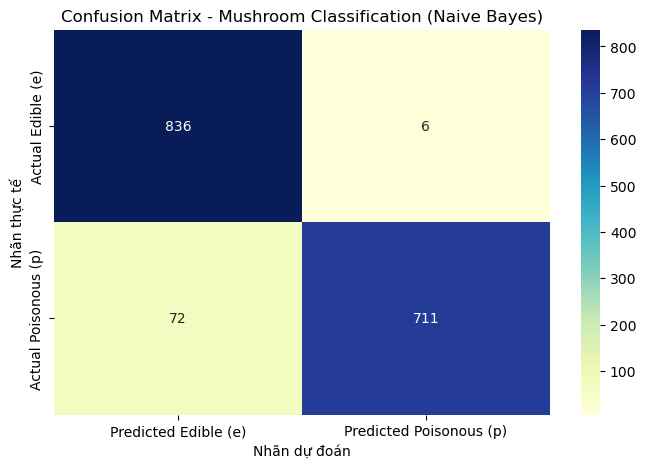

Confusion Matrix:
                      Predicted Edible (e)  Predicted Poisonous (p)
Actual Edible (e)                      836                        6
Actual Poisonous (p)                    72                      711


In [4]:
# Tính Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted Edible (e)', 'Predicted Poisonous (p)'], 
                          index=['Actual Edible (e)', 'Actual Poisonous (p)'])

# Vẽ Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Confusion Matrix - Mushroom Classification (Naive Bayes)')
plt.ylabel('Nhãn thực tế')
plt.xlabel('Nhãn dự đoán')
plt.show()

print("Confusion Matrix:")
print(conf_matrix)

### 5. Vẽ biểu đồ phân phối dự đoán vs thực tế

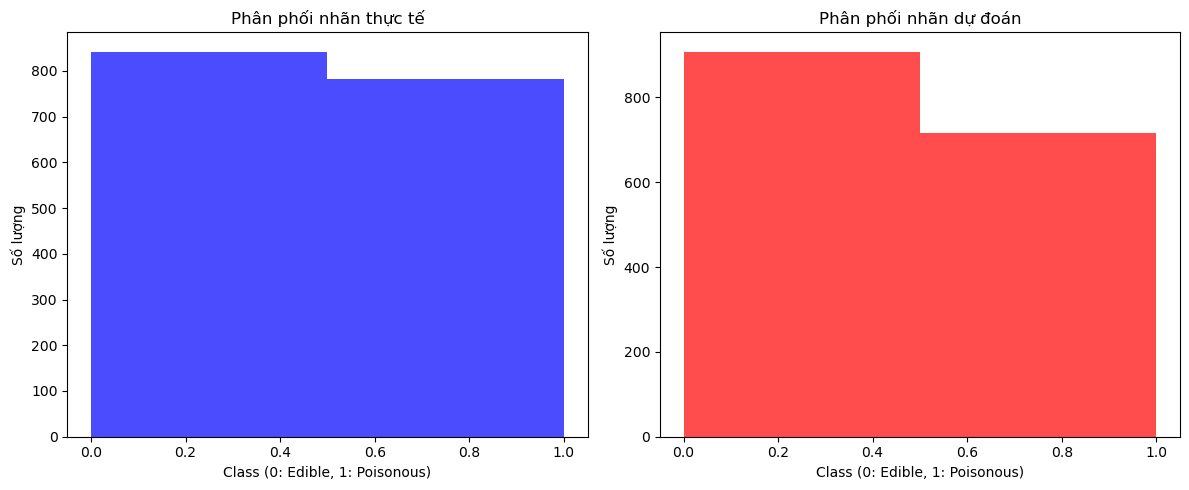

In [5]:
# Vẽ biểu đồ so sánh y_test và y_pred
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Phân phối thực tế
axes[0].hist(y_test, bins=2, alpha=0.7, label='Actual', color='blue')
axes[0].set_title('Phân phối nhãn thực tế')
axes[0].set_xlabel('Class (0: Edible, 1: Poisonous)')
axes[0].set_ylabel('Số lượng')

# Phân phối dự đoán
axes[1].hist(y_pred, bins=2, alpha=0.7, label='Predicted', color='red')
axes[1].set_title('Phân phối nhãn dự đoán')
axes[1].set_xlabel('Class (0: Edible, 1: Poisonous)')
axes[1].set_ylabel('Số lượng')

plt.tight_layout()
plt.show()

### 6. Tối ưu hóa mô hình với Cross-Validation

In [6]:
# Import Cross Validation
from sklearn.model_selection import cross_val_score

# Đánh giá với 5-fold Cross Validation
cv_scores = cross_val_score(nb_model, X_encoded, y_encoded, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

Cross-Validation Scores: [0.73292308 0.99507692 0.95630769 1.         0.54679803]
Mean CV Accuracy: 0.85 (+/- 0.36)
